In [89]:
import qiskit
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

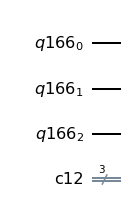

In [90]:
qr = qiskit.QuantumRegister(3)
cr = qiskit.ClassicalRegister(3)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

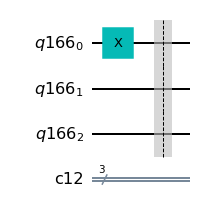

In [91]:
#Apply a X gate
circuit.x(qr[0])        # Xgate is a way to move from state 0 to state 1 - We are teleporting a |1> state
# circuit.h(qr[0])           # Apply a Hadamard gate to teleport a |+> state
circuit.barrier()
circuit.draw(output='mpl')

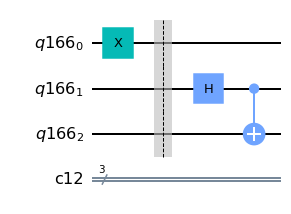

In [92]:
#Teleportation protocol
#1. Create an entanglement

circuit.h(qr[1])
circuit.cnot(qr[1], qr[2])
circuit.draw(output='mpl')      #q1 and q2 are entangled

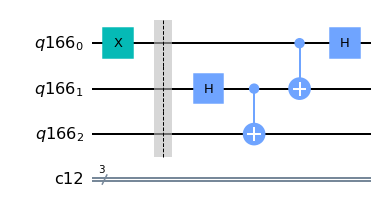

In [93]:
circuit.cnot(qr[0], qr[1])
circuit.h(qr[0])
circuit.draw(output='mpl')

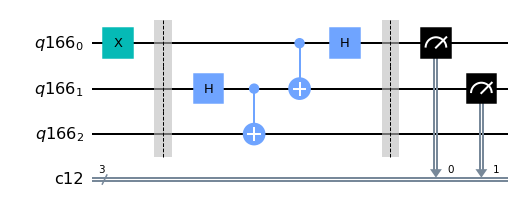

In [94]:
#2. Do the measurements
circuit.barrier()
circuit.measure([qr[0], qr[1]], [cr[0], cr[1]])
circuit.draw(output='mpl')

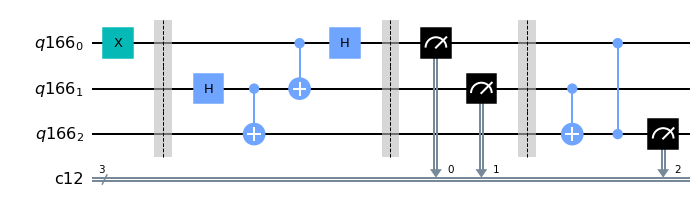

In [95]:
circuit.barrier()
circuit.cnot(qr[1], qr[2])
circuit.cz(qr[0], qr[2])
circuit.measure(qr[2], cr[2])
circuit.draw(output='mpl')      #Sate q0 is teleported to state q2

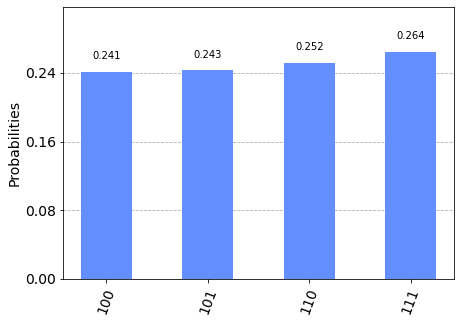

In [96]:
#Measure q0 and q2 to see if the teleportation is successful
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1024).result()
plot_histogram(result.get_counts(circuit))      #The X-axis shows in the order c2-c1-c0, so we see that we are always getting c2=1